# DSCI-100 Group 63 Project

# Unlocking the Mysteries of Pulsars: Predictive Insights and Analysis

## I. Introduction

### Background

Pulsars are rare neutron stars that produce radio radiation that can be detected on Earth. Pulsars emit a much stronger electromagnetic pulse than ordinary neutron stars but are still susceptible to "radio frequency interference". A lot of data, if it needs to be identified by humans, will waste a lot of resources (Zhao et al., 2022). It turns out that machine learning, statistical classification, and image classification can be applied to pulsar signal classification. This will greatly reduce the consumption of resources. We will load a data set named `HTRU_2` from the `CSV` file. This data contains eight common features of pulsars. Use these characteristics to feed the model. The correlation matrix is used to identify relationships between features as well as the relationships between features and the output categories (Gamage et al., 2022), helping to determine the pulsar data's characteristics.

### Question

The question to be addressed is: Can we accurately classify pulsar candidates based on the observed features?

Dataset: The dataset we will use is the description of sample pulsar candidates collected during the High Time Resolution Universe (HTRU) survey. In the dataset, each row represents a single candidate, which contains an overall of 17897 candidates. The variables in the dataset are summarized below:

1. `mean_pf`: Mean of the integrated profile.

2. `sd_pf`: Standard deviation of the integrated profile.

3. `exk_pf`: Excess kurtosis of the integrated profile.

4. `skew_pf`: Skewness of the integrated profile.

5. `mean_ds`: Mean of the DM-SNR curve.

6. `sd_ds`: Standard deviation of the DM-SNR curve.

7. `exk_ds`: Excess kurtosis of the DM-SNR curve.

8. `skew_ds`: Skewness of the DM-SNR curve.

9. `Class`: Labeled every candidate as 1 (positive) and 0 (negative). 

## II. Methods

- The `HTRU` dataset is made up of numerous attributes that were taken from cases that are neither pulsar candidates nor non-pulsars. In order to distinguish between these two classes, we set out to develop a classification model. 

- The given code serves as an example of the required procedures, which also include model training, exploratory data analysis, and data pretreatment.

- Data preparation is a crucial step to guarantee the dataset's quality and applicability for modelling. With regard to analysis, we used the `step_scale` and `step_center` functions to standardize the predictors. Different scales among variables are a problem that is addressed by standardization, allowing all variables to contribute equally to the model.

- Additionally, we corrected the dataset's class imbalance issue. When one class has noticeably more observations than the other, there is a class imbalance. We used upsampling using the `step_upsample` function from the `themis` package to reduce this problem. Upsampling balances the dataset by adding synthetic observations of the minority class, which can help the model better learn patterns from both classes.

- To visualize the associations between the predictors during exploratory data analysis, we utilized the `ggpairs` function from the `GGally` package. Understanding how different variables interact with one another can help reveal potential trends and correlations that could affect the categorization process.

- After preprocessing and exploratory analysis, we used the k-nearest neighbours (KNN) approach to training a classification model. The KNN algorithm classifies incoming observations according to how closely they resemble previous data in the training set. It is a non-parametric technique. In this investigation, we trained the KNN model using cross-validation for the robust assessment using the `train` function from the `tidymodels` package.

- A variety of assessment measures, including accuracy, precision, recall, and F1 score, may be used to evaluate the performance of the trained model. These metrics reveal how well the model can distinguish between the pulsar and non-pulsar cases. To choose the best strategy for this particular dataset, additional model assessment and comparison with various classification methods might be done.

- It is worth noting that this analysis assumes that the selected features from the dataset are relevant and informative for the classification task. Further feature selection techniques or domain expertise could be employed to identify the most influential features and potentially improve the model's performance.

## III. Results

1. Load the R package.

In [2]:
install.packages("themis")
install.packages("tidymodels")
install.packages("cli")
library(dplyr)
library(tidyverse)
library(repr)
library(ggplot2)
library(repr)
library(GGally)
library(broom)
library(themis)
library("tidymodels")

2. Load and read the raw dataset by `URL`. Since the raw data doesn't have the name on each variable, we need to identify a name for each variable by `col_names` function.

In [3]:
url<-"https://raw.githubusercontent.com/LawrenceZzf/DSCI100-G63-Proj1/main/HTRU_2.csv"
HTRU_data<-read_csv(url,col_names=FALSE)
colnames(HTRU_data)=c("mean_pf",
                 "sd_pf",
                 "exk_pf",
                 "skew_pf",
                 "mean_ds",
                 "sd_ds",
                 "exk_ds",
                 "skew_ds",
                 "class")
head(HTRU_data)

Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_pf,sd_pf,exk_pf,skew_pf,mean_ds,sd_ds,exk_ds,skew_ds,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


                                      table 2-0-1

### 1. Cluster: Predictor Selection

Clustering in statistics is a way to group similar things together. It helps us find patterns and structures in data without knowing the groups in advance. We use special algorithms to measure how similar or different data points are, and then we group them based on those measurements. Clustering is useful in many areas, like understanding customer groups, analyzing images, and finding unusual things in data. It helps us make better decisions and explore data more easily.

Generate the correlation between each two variables.

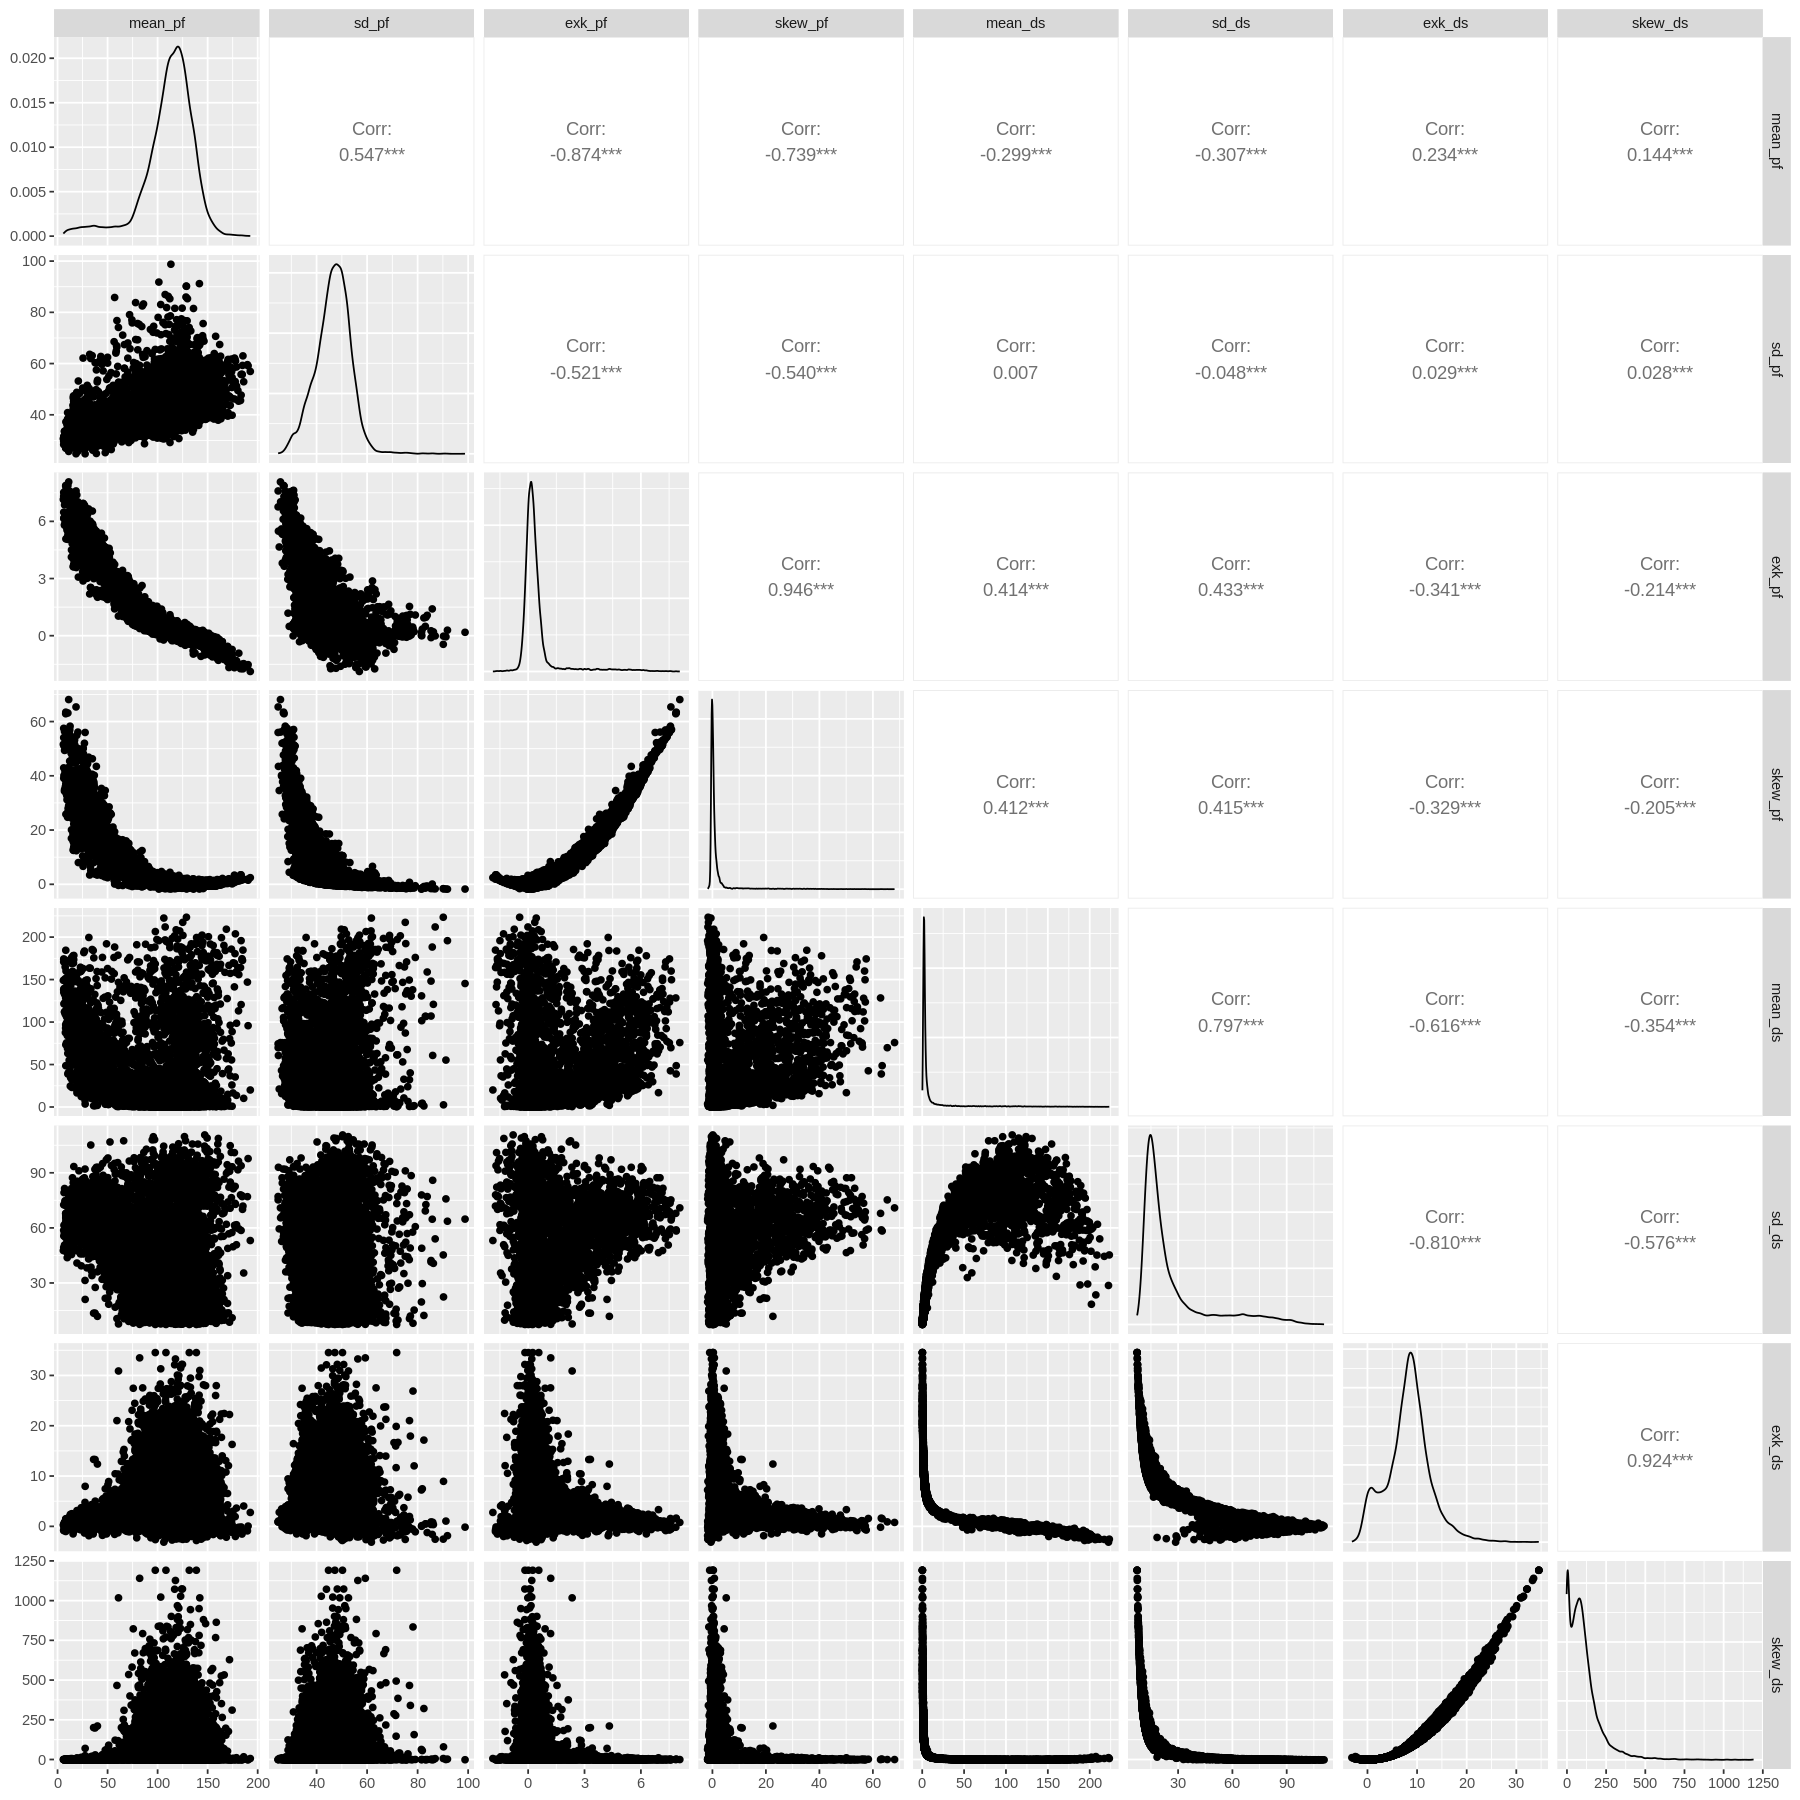

In [4]:
HTRU_data1<-HTRU_data|>
    select(-class)
options(repr.plot.height = 15, repr.plot.width = 15)
HTRU_pairs_plot<-ggpairs(HTRU_data1,columns=1:8)
HTRU_pairs_plot

                                                     figure 2-1-1

In [5]:
scaled_HTRU<-HTRU_data1|>
    mutate(across(everything(),scale))

Generate the statistical summary on different numbers of K.

In [6]:
ks<-tibble(k=seq(from=1,to=10,by=1))
set.seed(2025)
HTRU_stats<- ks |>
     rowwise() |>
     mutate(clusts = list(kmeans(scaled_HTRU, nstart=100,center=k)))|>
     mutate(glanced=list(glance(clusts)))|>
     select(-clusts)|>
     unnest(glanced)
HTRU_stats

Warning message:
“There were 20 warnings in `mutate()`.
The first warning was:
ℹ In argument: `clusts = list(kmeans(scaled_HTRU, nstart = 100, center = k))`.
ℹ In row 3.
Caused by warning:
! Quick-TRANSfer stage steps exceeded maximum (= 894900)
ℹ Run `dplyr::last_dplyr_warnings()` to see the 19 remaining warnings.”


k,totss,tot.withinss,betweenss,iter
<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,143176,143176.00,-4.307367e-09,1
2,143176,92209.22,5.096678e+04,1
3,143176,68068.18,7.510782e+04,4
4,143176,53117.85,9.005815e+04,5
5,143176,44216.54,9.895946e+04,5
6,143176,39131.05,1.040450e+05,4
7,143176,34349.87,1.088261e+05,7
8,143176,31188.33,1.119877e+05,6
9,143176,29186.67,1.139893e+05,5


                  table 2-1-1

Generate the plot of the number of individuals for different numbers of clusters.

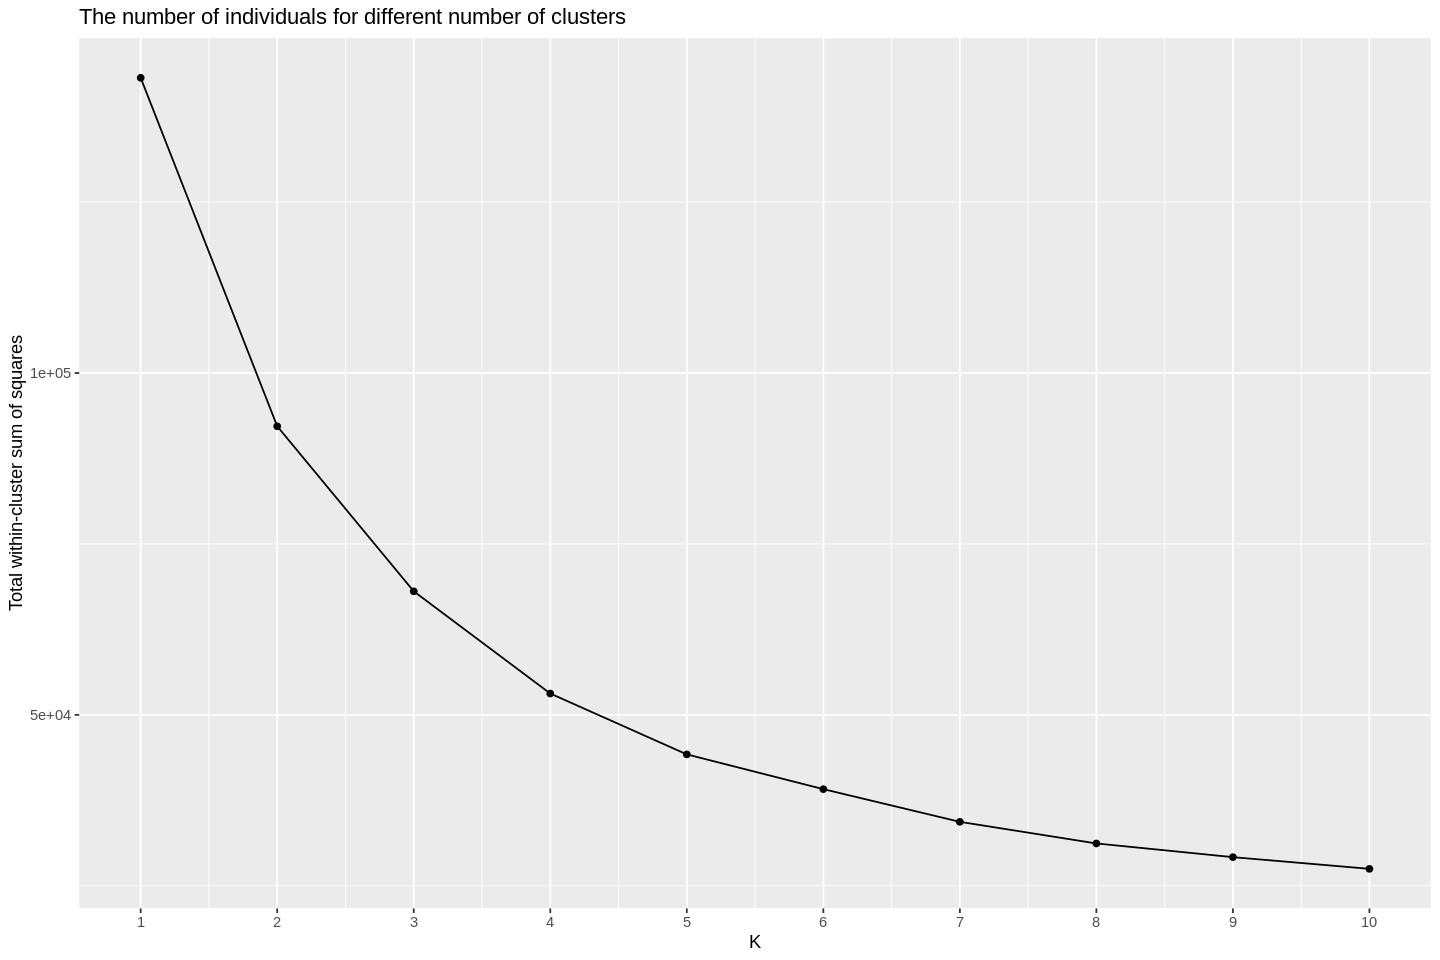

In [7]:
options(repr.plot.height = 8, repr.plot.width = 12)
HTRU_k_plot<-ggplot(HTRU_stats,aes(x=k,y=tot.withinss))+
    geom_point()+
    geom_line()+
    labs(x="K",y="Total within-cluster sum of squares")+
    scale_x_continuous(breaks = 1:10) +
    ggtitle('The number of individuals for different number of clusters')
HTRU_k_plot

                                           figure 2-1-2

We choose k=3 because increasing k further only decreased the total within-cluster sum of squares by a small amount, which means 3 is an effective k value for clustering.

In [8]:
set.seed(2024)
HTRU_cluster<-kmeans(scaled_HTRU,center=3,nstart=100)|>
    augment(scaled_HTRU)
head(HTRU_cluster)

mean_pf,sd_pf,exk_pf,skew_pf,mean_ds,sd_ds,exk_ds,skew_ds,.cluster
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
1.1492849,1.33479435,-0.66955083,-0.4004478,-0.3194313,-0.3706151,-0.07279575,-0.2874301,1
-0.3341589,1.80221498,-0.01178443,-0.3705251,-0.3710915,-0.5889076,0.50441285,0.2115755,1
-0.3143634,-1.05329280,-0.14522850,-0.1165896,-0.3220980,-0.2353216,-0.12599257,-0.3913625,1
1.0006664,1.55321102,-0.51339427,-0.3901672,-0.3043957,-0.2756588,-0.31225666,-0.4812869,1
-0.8713781,-0.85885481,0.11560548,-0.1048632,-0.3879995,-0.7630898,1.32398915,1.3867553,1
-0.6825595,0.02171238,0.05079471,-0.2194515,-0.3724816,-0.6050896,0.51445740,0.2491331,1


                                          table 2-1-2

Generate cluster plots on each variable.

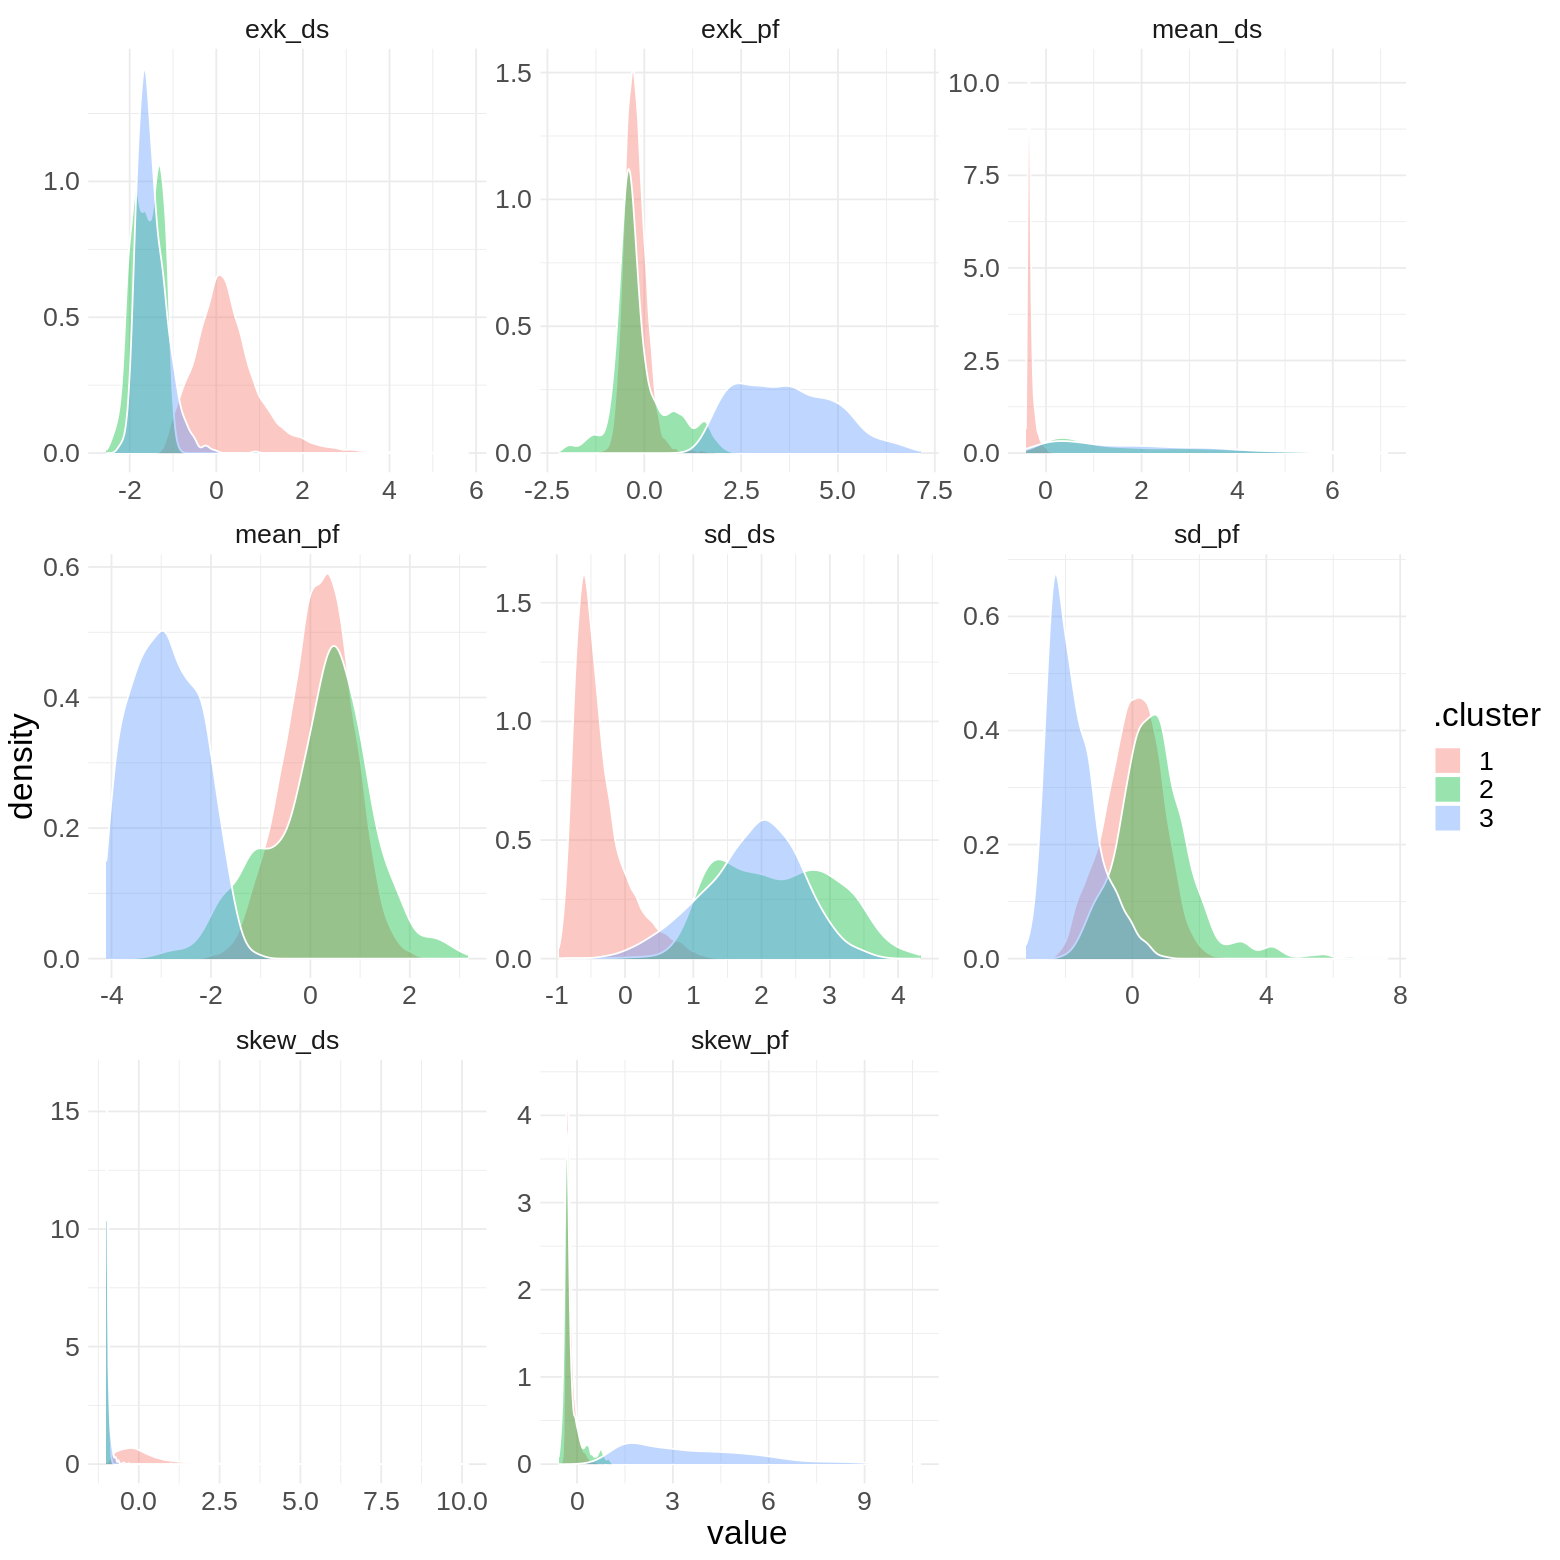

In [9]:
options(repr.plot.height = 13, repr.plot.width = 13)
HTRU_cluster_plot<-HTRU_cluster |>
    pivot_longer(cols = -.cluster, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = .cluster)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))
HTRU_cluster_plot

                                   figure 2-1-3

According to figure 2-1-3 and figure 2-1-1, we choose the predictors：`exk_ds`, `mean_pf`, `sd_ds`, `skew_ds` due to their relatively large relevance and clear separation on different clusters.

### 2. Prediction model by Classification

Classification in statistics is a method to predict or assign labels to different things based on certain characteristics. It helps us categorize or sort data into specific groups or classes. We use statistical models and algorithms to analyze patterns in the data and make predictions about the class or category to which new data points belong. It helps us make informed decisions and understand the relationships between different variables in the data.

Preliminary exploratory data analysis

In [10]:
HTRU_pre_data<-HTRU_data|>
    mutate(class=as_factor(class))|>
    select(exk_ds,mean_pf,sd_ds,skew_ds,class)
head(HTRU_pre_data)

exk_ds,mean_pf,sd_ds,skew_ds,class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.975532,140.56250,19.11043,74.24222,0
10.576487,102.50781,14.86015,127.39358,0
7.735822,103.01562,21.74467,63.17191,0
6.896499,136.75000,20.95928,53.59366,0
14.269573,88.72656,11.46872,252.56731,0
10.621748,93.57031,14.54507,131.39400,0


       table 2-2-1

Generate the correlation between each two variables of `exk_ds`, `mean_pf`, `sd_ds`, `skew_ds` variables.

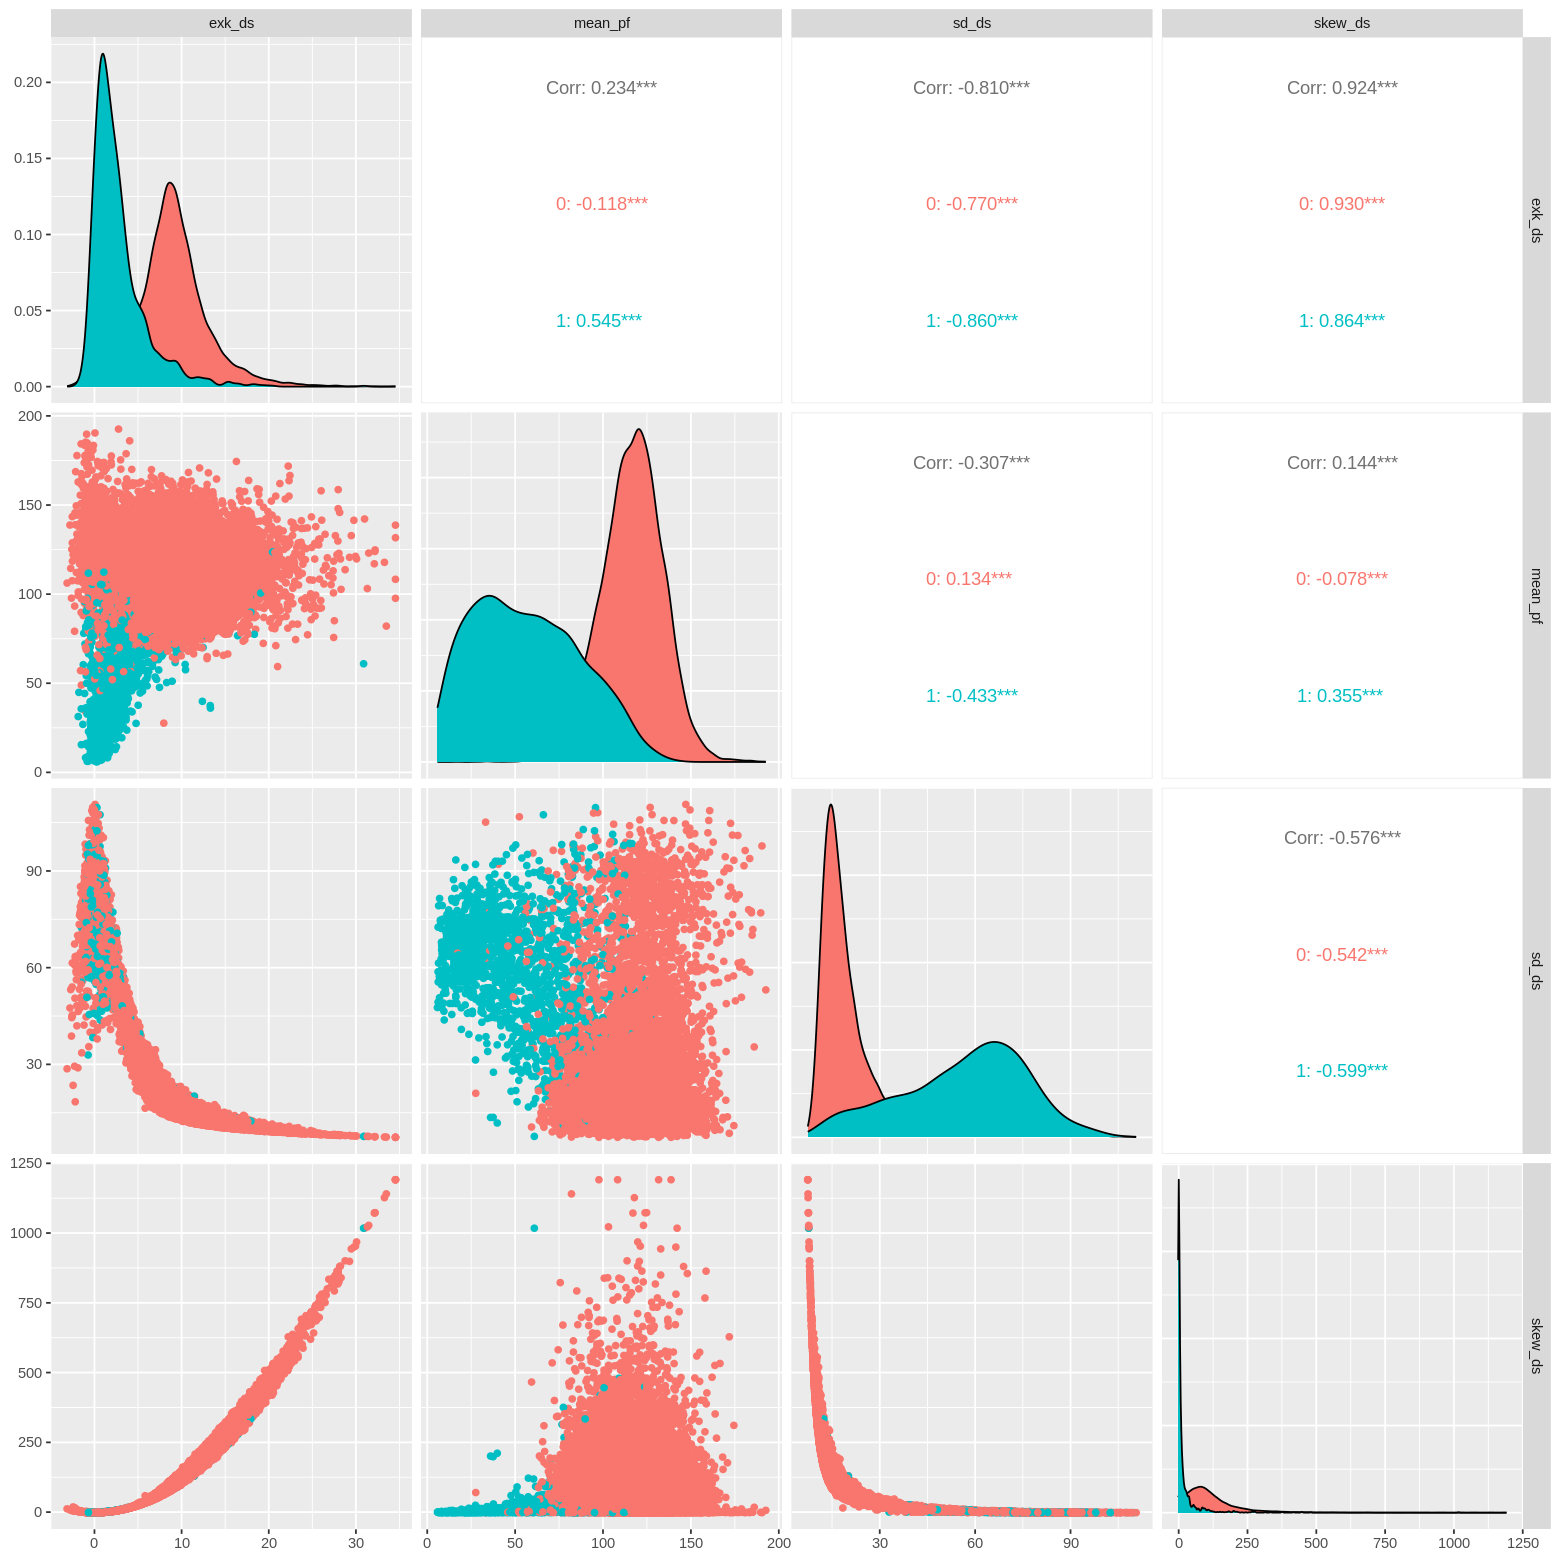

In [11]:
HTRU_var_plot<-ggpairs(HTRU_pre_data,columns=1:4,aes(color=class))
HTRU_var_plot

                                                 figure 2-2-1

In [12]:
observations<-HTRU_pre_data|>
    group_by(class)|>
    summarize(n=n())
observations

class,n
<fct>,<int>
0,16259
1,1639


     table 2-2-2

From table 2-1-1, we can see the scales of some variables have large differences, so we need to standardize the dataset by `step_scale` function first.

By table 2-2-2, we can see most (90.84%) of the data are classified as 0 (negative), which means most of the observations can not be considered pulsar. Therefore, our data set is imbalanced. In this scenario, it is expected that our k-nearest classification prediction model would tend to classify the observations as 0. This is because the algorithm learns from the training data and makes predictions based on similar instances. Hence, the imbalanced dataset will greatly influence the precision of the model.

Therefore, we also need to rebalance the data by `step_upsample` function in `themis` package.

In [13]:
HTRU_recipe<-recipe(class~.,data=HTRU_pre_data)|>
    step_upsample(class, over_ratio = 1, skip = FALSE)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())|>
    prep()

upsampled_HTRU <- bake(HTRU_recipe, HTRU_pre_data)

upsampled_HTRU |>
  group_by(class) |>
  summarize(n = n())

class,n
<fct>,<int>
0,16259
1,16259


 table 2-2-3

Generate the balanced correlation between each two variables of `exk_ds`, `mean_pf`, `sd_ds`, `skew_ds` variables.

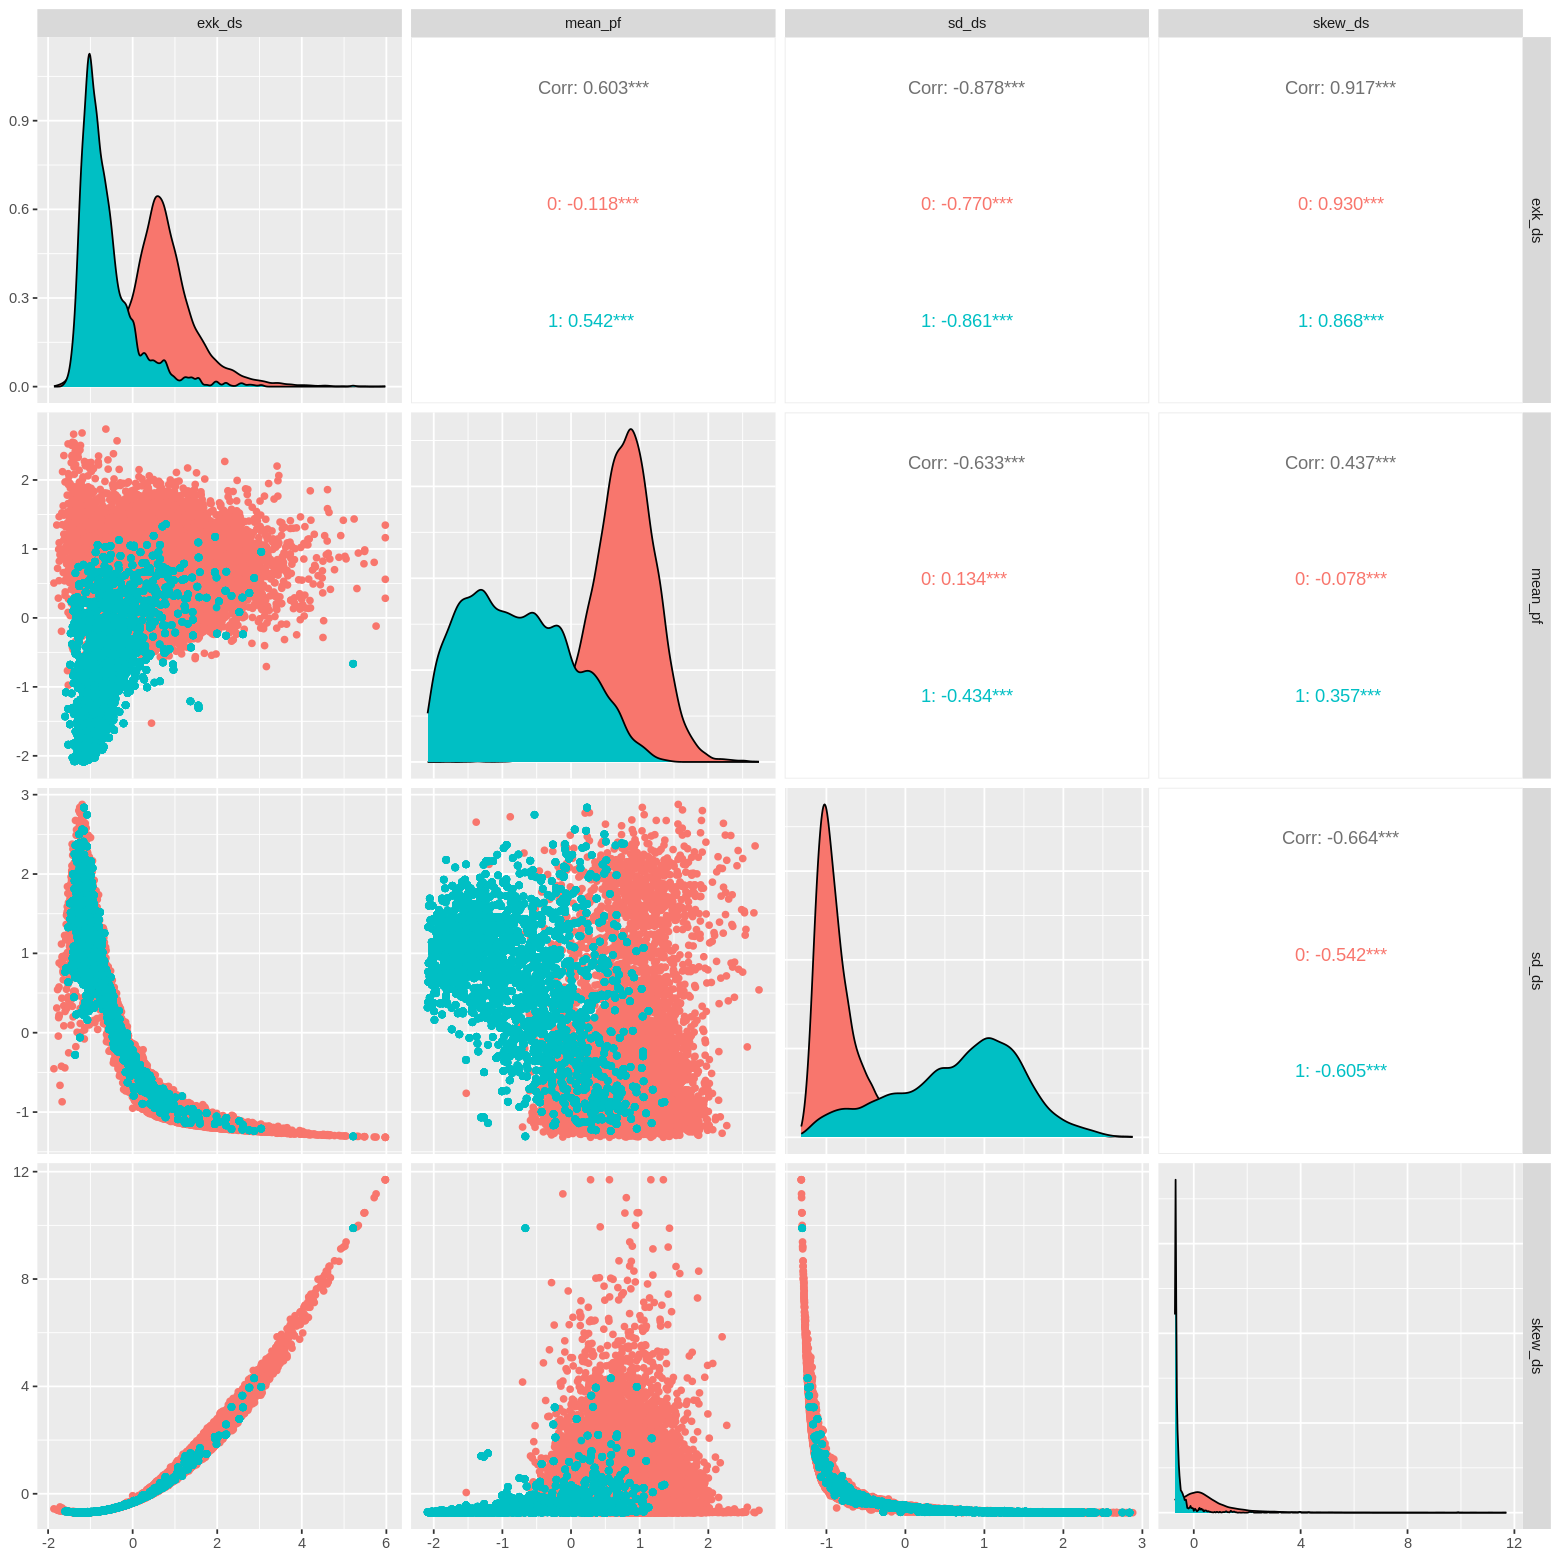

In [14]:
HTRU_balance_plot<-ggpairs(upsampled_HTRU,columns=1:4,aes(color=class))
HTRU_balance_plot

                                               figure 2-2-2

Comparing figure 2-2-1 and figure 2-2-2, we can see now our dataset is balanced and there exists the same number of data for each class. 

In [15]:
HTRU_split<-initial_split(upsampled_HTRU,prop=0.75,strata=class)
HTRU_train<-training(HTRU_split)
HTRU_test<-testing(HTRU_split)

Use the training data and testing data to generate the statistical summary for `exk_ds`, `mean_pf`, `sd_ds`, `skew_ds` variables.

In [18]:
summary(HTRU_train[c("mean_pf","sd_ds","exk_ds","skew_ds")])

    mean_pf              sd_ds               exk_ds         
 Min.   :-2.089475   Min.   :-1.318285   Min.   :-1.862379  
 1st Qu.:-0.844884   1st Qu.:-0.920931   1st Qu.:-0.865382  
 Median : 0.237873   Median :-0.288525   Median :-0.137621  
 Mean   :-0.001575   Mean   : 0.002229   Mean   :-0.002624  
 3rd Qu.: 0.810498   3rd Qu.: 0.901523   3rd Qu.: 0.685034  
 Max.   : 2.738462   Max.   : 2.877306   Max.   : 5.975524  
    skew_ds         
 Min.   :-0.704801  
 1st Qu.:-0.666685  
 Median :-0.402874  
 Mean   :-0.002878  
 3rd Qu.: 0.326277  
 Max.   :11.699155  

                         table 2-2-4

Comparing these four variables:

Min: `skew_ds` > `sd_ds` > `exk_ds` > `mean_pf`

1st Qu: `skew_ds` > `mean_pf` > `exk_ds` > `sd_ds`

Median: `mean_pf` > `exk_ds` > `sd_ds` > `skew_ds`

Mean: `sd_ds` > `mean_pf` > `exk_ds` > `skew_ds`

3rd Qu: `sd_ds` > `mean_pf` > `exk_ds` > `skew_ds`

Max: `skew_ds` > `exk_ds` > `sd_ds` > `mean_pf`

### 3. K-nearest neighbors classification

K-nearest neighbors (KNN) classification is a technique in statistics where we classify new data points based on their similarity to the known data points.  It works by finding the K nearest neighbors to the new data point and assigning it the majority class among those neighbors.  The "K" represents the number of neighbors considered for classification, which is chosen by the user.  KNN is a simple and intuitive algorithm that relies on the idea that similar things are likely to belong to the same class.

This code sample illustrates the use of K-nearest neighbors (KNN) classification on the HTRU dataset. It begins by establishing a procedure for preparing the data, which includes scaling and centering the predictors. The "kknn" engine is used to define the KNN model, then stratified 10-fold cross-validation is used to estimate the number of neighbors through hyperparameter tweaking. The algorithm then gathers performance data for various setups and shows the link between the average accuracy and the number of neighbors. Using the ideal number of neighbors, the best-performing KNN model is then trained, and its performance is assessed on the test dataset, producing accuracy and kappa scores.

In [33]:
HTRU_prediction_recipe<-recipe(class~.,data=HTRU_train)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())

In [34]:
knn_tune<-nearest_neighbor(weight_func="rectangular", neighbors=tune())|>
    set_engine("kknn")|>
    set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [40]:
HTRU_vfold <- vfold_cv(HTRU_train, v = 10, strata = class)
ks<-tibble(neighbors=seq(from=1,to=10,by=1))
HTRU_results <- workflow() |>
       add_recipe(HTRU_prediction_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = HTRU_vfold, grid = ks) |>
       collect_metrics()
HTRU_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9838854,10,0.0006975294,Preprocessor1_Model01
1,roc_auc,binary,0.9838854,10,0.0006975294,Preprocessor1_Model01
2,accuracy,binary,0.9838854,10,0.0006975294,Preprocessor1_Model02
2,roc_auc,binary,0.9841589,10,0.0007526631,Preprocessor1_Model02
3,accuracy,binary,0.9733886,10,0.0007957911,Preprocessor1_Model03
3,roc_auc,binary,0.9844540,10,0.0007823054,Preprocessor1_Model03
4,accuracy,binary,0.9733886,10,0.0007957911,Preprocessor1_Model04
4,roc_auc,binary,0.9847430,10,0.0007365924,Preprocessor1_Model04
5,accuracy,binary,0.9630561,10,0.0012622906,Preprocessor1_Model05


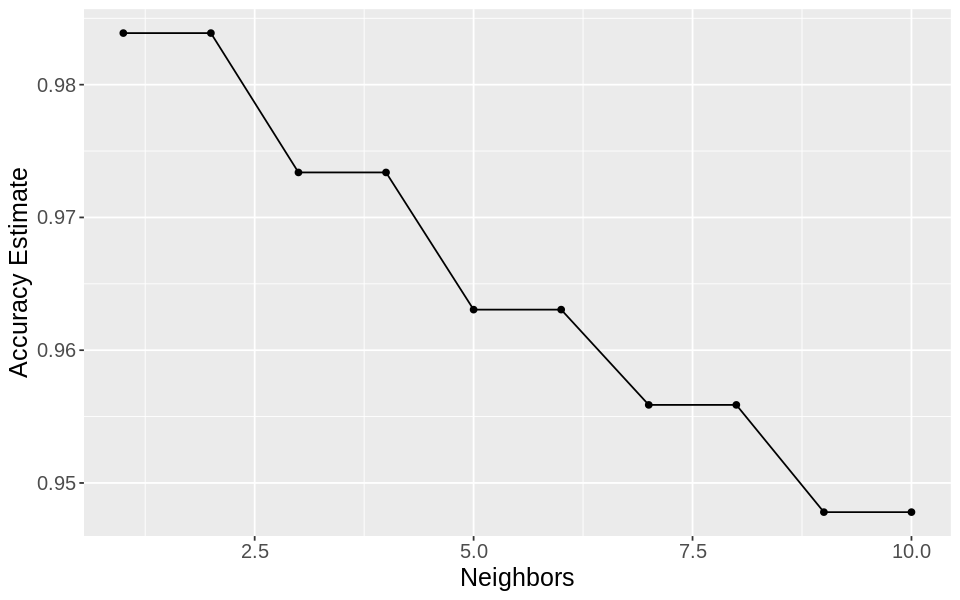

In [41]:
options(repr.plot.width = 8, repr.plot.height = 5)
accuracy<-HTRU_results|>
    filter(.metric=="accuracy")
accuracy_plot<-ggplot(accuracy,aes(x=neighbors,y=mean))+
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 15))
accuracy_plot

In [42]:
K_min <- accuracy |>
    arrange(desc(mean)) |> 
    slice(1)|>
    pull(neighbors)
K_min

[1] 1

In [46]:
HTRU_best_spec<-nearest_neighbor(weight_func="rectangular", neighbors=K_min)|>
    set_engine("kknn")|>
    set_mode("classification")

HTRU_fit<-workflow()|>
    add_recipe(HTRU_prediction_recipe)|>
    add_model(HTRU_best_spec)|>
    fit(data=HTRU_train) 
HTRU_summary <- HTRU_fit |>
           predict(HTRU_test) |>
           bind_cols(HTRU_test)|>
           metrics(truth=class,estimate=.pred_class)
HTRU_summary  

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9857319
kap,binary,0.9714637


## IV. Discussion

### Expected outcomes and significance

By our analysis, the best K-value is 1, which shows an extreme situation. That means the classification our new data only needs to base on the nearest single neighbor point. Recall that we have rebalanced the dataset and it is large enough, and the accuracy of our model on testing data set is quite good: over 98.57%, so phenomena of overfitting has been eliminated. But what causes this phenomenon? This is because the data within each label is very similar, and the data points of different labels have significant differences.

The results of the study reveal a significant correlation between the chosen predictor variables and the prediction target. Through the utilization of the K-NN classifier, pulsar data was successfully identified within the `HTRU2` dataset, presenting a valuable contribution to the field of astronomy. The discovery holds immense potential in advancing astronomical research, particularly in terms of enhancing the efficiency and dependability of pulsar detection. It is important to acknowledge, however, that this classification approach may exhibit a higher false positive rate (Gamage et al., 2022).
 
Now, back to our previous question: Can we accurately classify pulsar candidates based on the observed features? The answer is yes. The predictors we choose are of great relevance and reference significance, because it can help us classify new data effectively and determine if it is qualified as a pulsar candidate.

### Limitations

The results of this study have generated several noteworthy considerations and avenues for further exploration. A few potential issues to address are as follows:

- The prediction model currently lacks the ability to determine thresholds for data classification across variables.

- The classification model displays sensitivity to outliers, which introduces the possibility of prediction errors.

To enhance our model in future research, we propose the following actions:

- Implementing classification models with varying levels of accuracy to effectively differentiate between different types of pulsars.

- Validating and generalizing the classification models by applying them to additional datasets for celestial object detection.

- Conducting in-depth analysis of data classified as 0 to extract valuable insights and meaningful information.

By incorporating these improvements, we aim to advance the accuracy and robustness of our model while expanding our understanding of pulsars and related phenomena.

# Reference

Gamage, V., Ayoob, M., & Jayakumar, K. (2022, March). Pulsar Candidate Selection Using Gaussian Hellinger Extremely Fast Decision Tree. In *2022 2nd International Conference on Image Processing and Robotics (ICIPRob)* (pp. 1-7). IEEE.

https://doi.org/10.1109/ICIPRob54042.2022.9798721

Zhao, H., Jin, J., Liu, Y., Shen, Y., & Jiang, Y. (2022). AdaBoost-MICNN: a new network framework for pulsar candidate selection. *Monthly Notices of the Royal Astronomical Society, 513*(2), 2869-2883.

https://doi.org/10.1093/mnras/stac619